Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

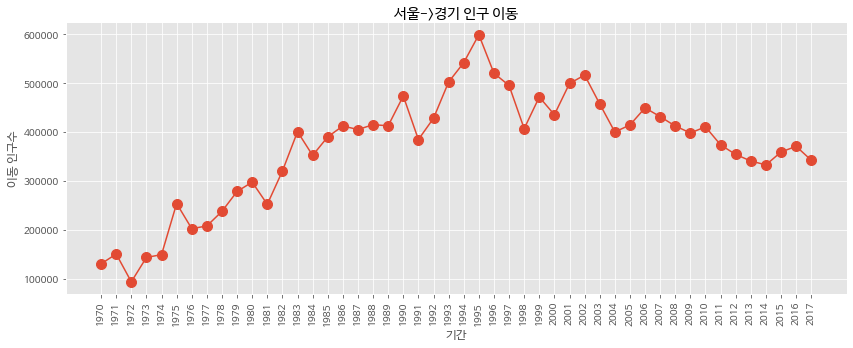

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path=('/content/inoutpeople.xlsx')
df=pd.read_excel(file_path, engine='openpyxl', header=0)

#누락값(NaN)을 앞 ㅇ데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

#true인 부분만 df_seoul에 저장, 즉 서울에서 다른 지역으로 전출(이동)하는 데이터만
df_seoul = df[mask]

#필요없으니까 버린다 drop
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#inplace=True, df_seoul을 바꿔라, false이면 연결된 df_seoul가 바뀌지 않고 객체에 할당해줘야 함
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

#'전입지'가 df_seoul의 행인덱스로 지정
df_seoul.set_index('전입지', inplace=True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택, loc --> 열선택
sr_one = df_seoul.loc['경기도']
#print(sr_one)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#스타일 서식 지정
plt.style.use('ggplot')

#그림 사이즈 지정
plt.figure(figsize=(14, 5))

#x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x, y 축 데이터를 plot 함수에 입력 , 원모양의 사이즈 10인 점
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

#차트 제목, 축이름
plt.rc('font', family='NanumBarunGothic')
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

#x,y 축 데이터를 plot 함수에 입력
#plt.plot(sr_one.index, sr_one.values)

#판다스 객체를 plot 함수에 입력, 위와 동일한 기능
#plt.plot(sr_one)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

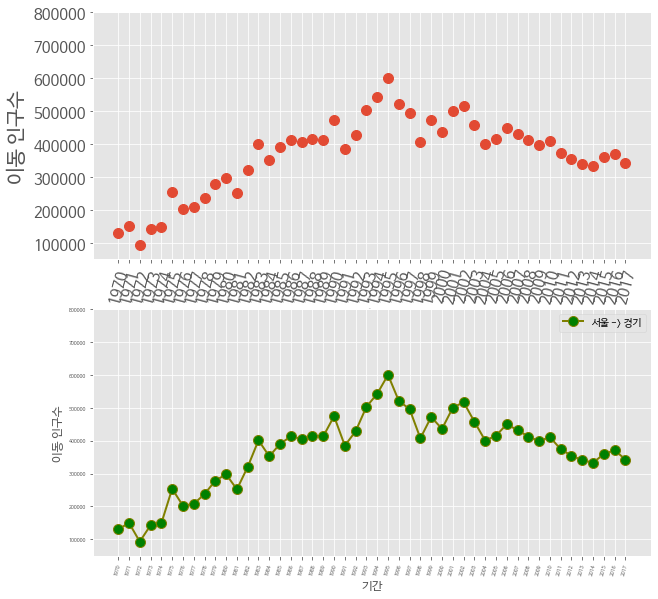

In [ ]:
from matplotlib import axis
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path=('/content/inoutpeople.xlsx')
df=pd.read_excel(file_path, engine='openpyxl', header=0)

#누락값(NaN)을 앞 ㅇ데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

#true인 부분만 df_seoul에 저장, 즉 서울에서 다른 지역으로 전출(이동)하는 데이터만
df_seoul = df[mask]

#필요없으니까 버린다 drop
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#inplace=True, df_seoul을 바꿔라, false이면 연결된 df_seoul가 바뀌지 않고 객체에 할당해줘야 함
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

#'전입지'가 df_seoul의 행인덱스로 지정
df_seoul.set_index('전입지', inplace=True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택, loc --> 열선택
sr_one = df_seoul.loc['경기도']
#print(sr_one)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#스타일 서식 지정
plt.style.use('ggplot')

fig =plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

ax1.set_xlabel('기간', size=20)
ax1.set_ylabel('이동 인구수', size = 20)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size = 12)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=5)
ax2.tick_params(axis='y', labelsize=5)

plt.show()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

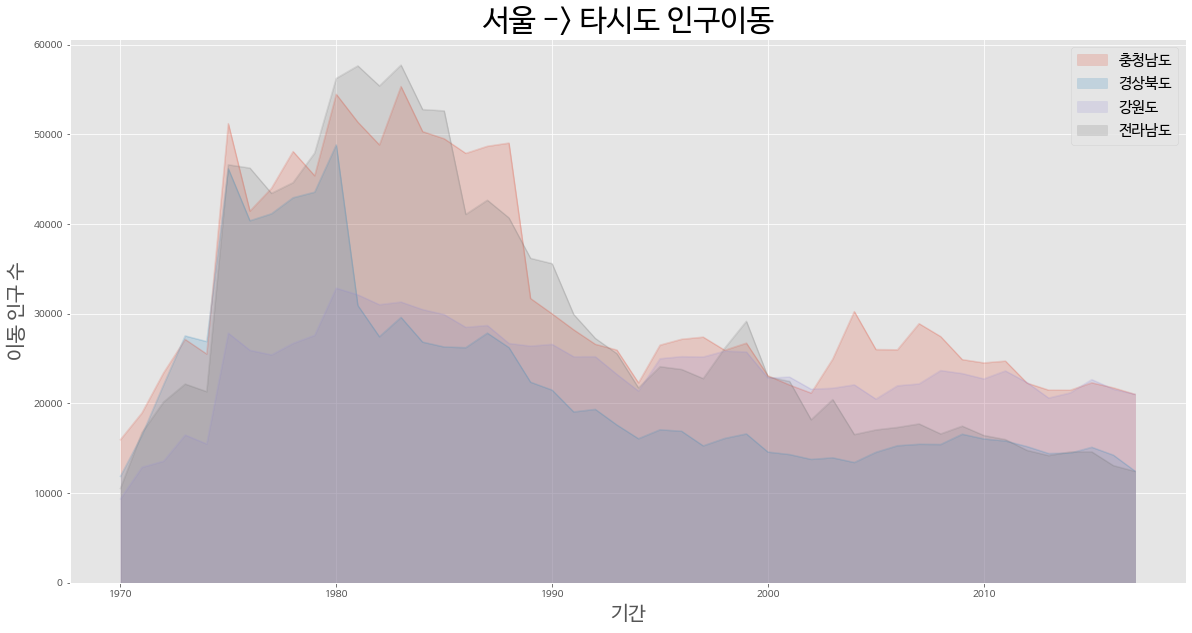

In [2]:
from matplotlib import axis
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path=('/content/inoutpeople.xlsx')
df=pd.read_excel(file_path, engine='openpyxl', header=0)

#누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

#true인 부분만 df_seoul에 저장, 즉 서울에서 다른 지역으로 전출(이동)하는 데이터만
df_seoul = df[mask]

#필요없으니까 버린다 drop
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#inplace=True, df_seoul을 바꿔라, false이면 연결된 df_seoul가 바뀌지 않고 객체에 할당해줘야 함
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

#'전입지'가 df_seoul의 행인덱스로 지정
df_seoul.set_index('전입지', inplace=True)

df_4 = df_seoul.loc[['충청남도','경상북도','강원도', '전라남도']]
df_4= df_4.transpose()

#수도코드로 한글 제목 변경하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

# 스타일 서식 지정
plt.style.use('ggplot')

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

         2010     2011     2012     2013     2014     2015     2016     2017
전입지                                                                         
충청남도  24522.0  24723.0  22269.0  21486.0  21473.0  22299.0  21741.0  21020.0
경상북도  16042.0  15818.0  15191.0  14420.0  14456.0  15113.0  14236.0  12464.0
강원도   22736.0  23624.0  22332.0  20601.0  21173.0  22659.0  21590.0  21016.0
전라남도  16429.0  15974.0  14765.0  14187.0  14591.0  14598.0  13065.0  12426.0
전입지
충청남도    179533.0
경상북도    117740.0
강원도     175731.0
전라남도    116035.0
dtype: float64
전입지
전라남도    116035.0
경상북도    117740.0
강원도     175731.0
충청남도    179533.0
dtype: float64


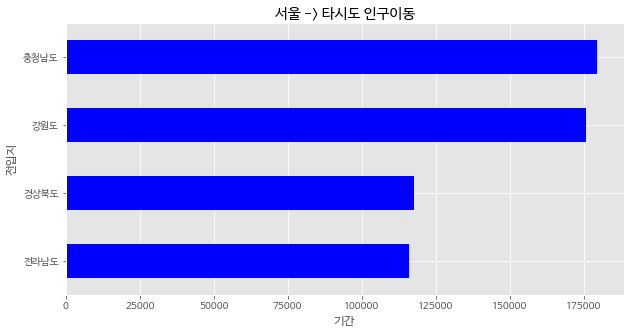

In [8]:
from matplotlib import axis
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path=('/content/inoutpeople.xlsx')
df=pd.read_excel(file_path, engine='openpyxl', header=0)

#누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도' , '강원도', '전라남도'], col_years]
print(df_4)

sumbyconti =df_4.sum(axis=1)
print(sumbyconti)

df_total = sumbyconti.sort_values(ascending=True)
print(df_total)

plt.style.use('ggplot')

#수평막대 그리기
df_total.plot(kind='barh', figsize=(10,5), width=0.5, color='blue')
plt.title('서울 -> 타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('기간')

plt.show()

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

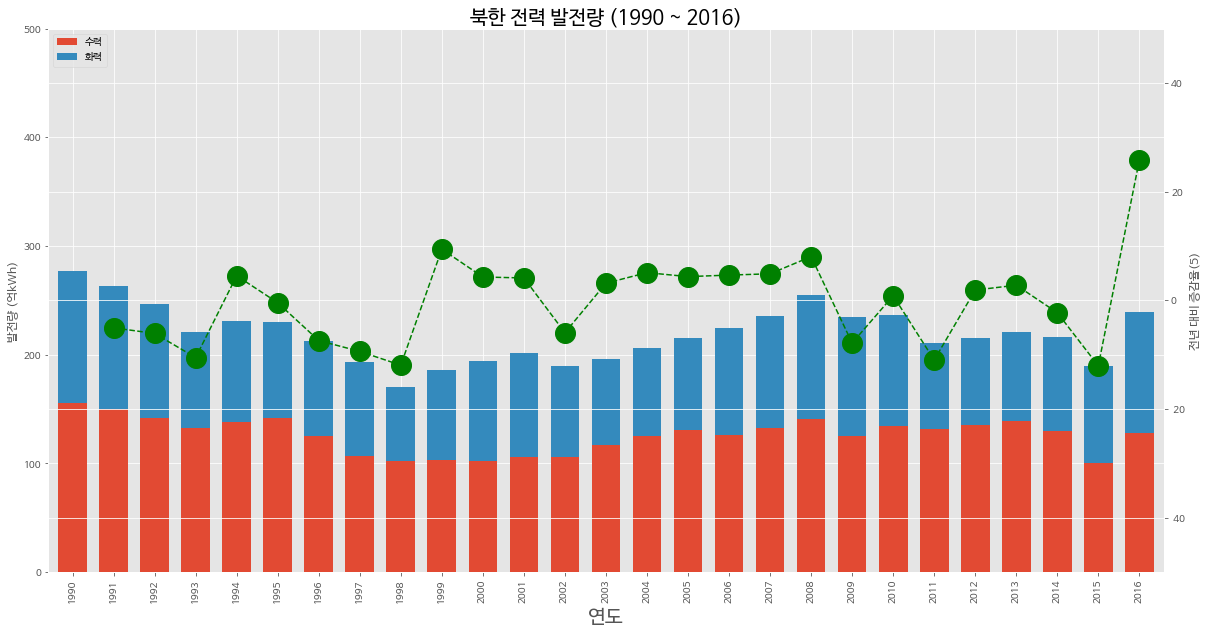

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path=('/content/남북한발전전력량.xlsx')
df=pd.read_excel(file_path, engine='openpyxl', header=0, convert_float=True)
print(df)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
print(df)

df = df.T
print(df[:10])
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) -1)*100

ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)

ax2=ax1.twinx()
ax2.plot(df.index, df.증감율, linestyle='--', marker='o', markersize=20,
          color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량 (억kWh)')
ax2.set_ylabel('전년 대비 증감율(5)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=20)
ax1.legend(loc='upper left')

plt.show()

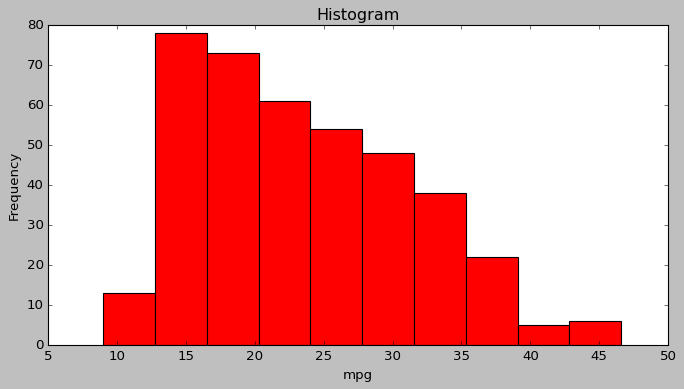

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') #스타일 서식 지정

#read_csv()함수로 df 생성
df = pd.read_csv('/content/auto-mpg.csv', header=None)

#열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'accelcration',
              'model year', 'origin', 'name']

#연비[mpg] 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='red', figsize=(10,5))

#그래프 꾸미기
plt.title("Histogram")
plt.xlabel('mpg')
plt.show()

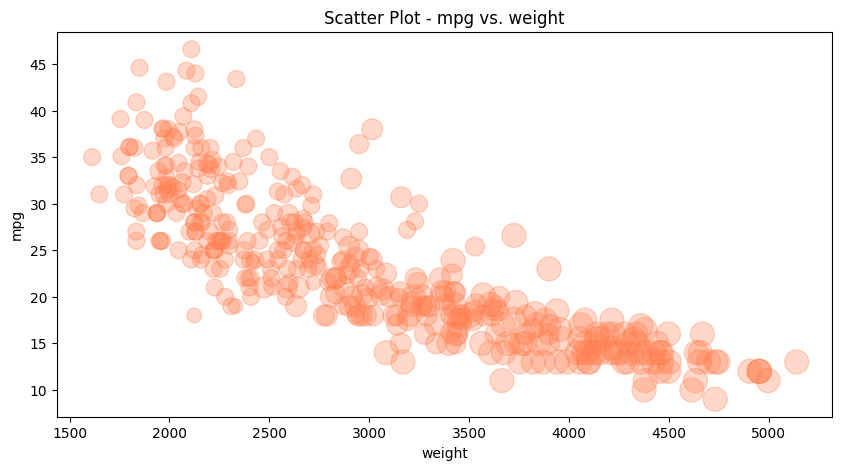

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') #스타일 서식 지정

#read_csv()함수로 df 생성
df = pd.read_csv('/content/auto-mpg.csv', header=None)

#열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'accelcration',
              'model year', 'origin', 'name']

cylinders_size = df.cylinders / df.cylinders.max() * 300

#연비(mpg)와 차중(weight) 열에 대한 히스토그램 그리기, c=color, s=size
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
        s=cylinders_size, alpha=0.3)
plt.title("Scatter Plot - mpg vs. weight")
plt.show()

           mpg  cylinders  displacement    weight  accelcration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


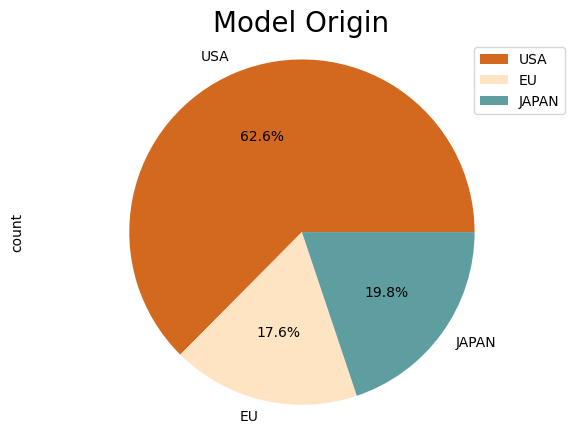

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') #스타일 서식 지정

#read_csv()함수로 df 생성
df = pd.read_csv('/content/auto-mpg.csv', header=None)

#열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'accelcration',
              'model year', 'origin', 'name']

#데이터 개수 카운트를 위해 값 1을 가진 열을 추가
#만약에 0이면 0을 모두 다 sum해도 0
df['count'] = 1
df_origin= df.groupby('origin').sum() #origin열을 기준으로 그룹화, 합계 연산
print(df_origin.head())               # 그룹 연산 결과 출력

#제조국가(origin)값을 실제 지역명으로 변경
df_origin.index=['USA', 'EU', 'JAPAN']

#제조국가열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%', #퍼센트 % 표시
                        colors=['chocolate', 'bisque', 'cadetblue']    #색상리스트
                        )

plt.title('Model Origin', size=20)
plt.axis('equal') #파이 차트의 비율을 같게 (원에 가깝게)조정 
plt.legend(labels=df_origin.index, loc='upper right') #범례 표시
plt.show()